## Correlation and Redundancy

I claim that there is correlation and redundancy in the `customer` table. What I mean by this is that some features are linear combinations of other features. 

Let's examine redundancy by dropping a feature and seeing if the other features can predict it.

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import display

customers = pd.read_csv('Wholesale_customers_data.csv')
customers.Region = customers.Region.astype('category')
customers.Channel = customers.Channel.astype('category')
customer_features = customers.select_dtypes(exclude = ['category'])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [8]:
customer_features['Detergents_Paper'].shape

(440,)

In [9]:
def calculate_r_2_for_feature(data, feature):
    new_data = data.drop(feature, axis=1)
    target = data[feature]

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,target,test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

In [11]:
calculate_r_2_for_feature(customer_features,'Detergents_Paper')

0.4958460415473772

In [13]:
print("{:24} {}".format("Delicatessen: ", calculate_r_2_for_feature(customer_features,'Delicatessen')))
print("{:24} {}".format("Degergents_paper: ", calculate_r_2_for_feature(customer_features,'Detergents_Paper')))
print("{:24} {}".format("Fresh: ", calculate_r_2_for_feature(customer_features,'Fresh')))
print("{:24} {}".format("Frozen: ", calculate_r_2_for_feature(customer_features,'Frozen')))
print("{:24} {}".format("Grocery: ", calculate_r_2_for_feature(customer_features,'Grocery')))
print("{:24} {}".format("Milk: ", calculate_r_2_for_feature(customer_features,'Milk')))

Delicatessen:            -21.738729584648663
Degergents_paper:        0.7194771528933368
Fresh:                   -0.5630552137789899
Frozen:                  -3.032389626846757
Grocery:                 0.6920581596708334
Milk:                    0.3427768151142886


But this is subject to randomness. There is randomness in my `train_test_split`. Let's do the whole thing many times and take the average. 

In [14]:
def mean_r2_for_feature(data, feature):
    scores = []
    for _ in range(100):
        scores.append(calculate_r_2_for_feature(data, feature))
        
    scores = np.array(scores)
    return scores.mean()

In [15]:
print("{:24} {}".format("Delicatessen: ", mean_r2_for_feature(customer_features,'Delicatessen')))
print("{:24} {}".format("Detergents_Paper: ", mean_r2_for_feature(customer_features,'Detergents_Paper')))
print("{:24} {}".format("Fresh: ", mean_r2_for_feature(customer_features,'Fresh')))
print("{:24} {}".format("Frozen: ", mean_r2_for_feature(customer_features,'Frozen')))
print("{:24} {}".format("Grocery: ", mean_r2_for_feature(customer_features,'Grocery')))
print("{:24} {}".format("Milk: ", mean_r2_for_feature(customer_features,'Milk')))

Delicatessen:            -3.6482199957139376
Detergents_Paper:        0.6553233816293702
Fresh:                   -0.7152530761580453
Frozen:                  -1.3617630747173832
Grocery:                 0.6762919499587713
Milk:                    0.1208179692232612


In [16]:
print("{:24} {}".format("Delicatessen: ", mean_r2_for_feature(customer_features,'Delicatessen')))
print("{:24} {}".format("Detergents_Paper: ", mean_r2_for_feature(customer_features,'Detergents_Paper')))
print("{:24} {}".format("Fresh: ", mean_r2_for_feature(customer_features,'Fresh')))
print("{:24} {}".format("Frozen: ", mean_r2_for_feature(customer_features,'Frozen')))
print("{:24} {}".format("Grocery: ", mean_r2_for_feature(customer_features,'Grocery')))
print("{:24} {}".format("Milk: ", mean_r2_for_feature(customer_features,'Milk')))

Delicatessen:            -2.5382008206034543
Detergents_Paper:        0.6765058312253582
Fresh:                   -0.6759051142256272
Frozen:                  -1.3826765158761907
Grocery:                 0.6778224299882902
Milk:                    0.1796382169862176


##### Discussion

What does this tell us?

### Visualize Redundancy

Study the correlation of the data.

5.236386060714722


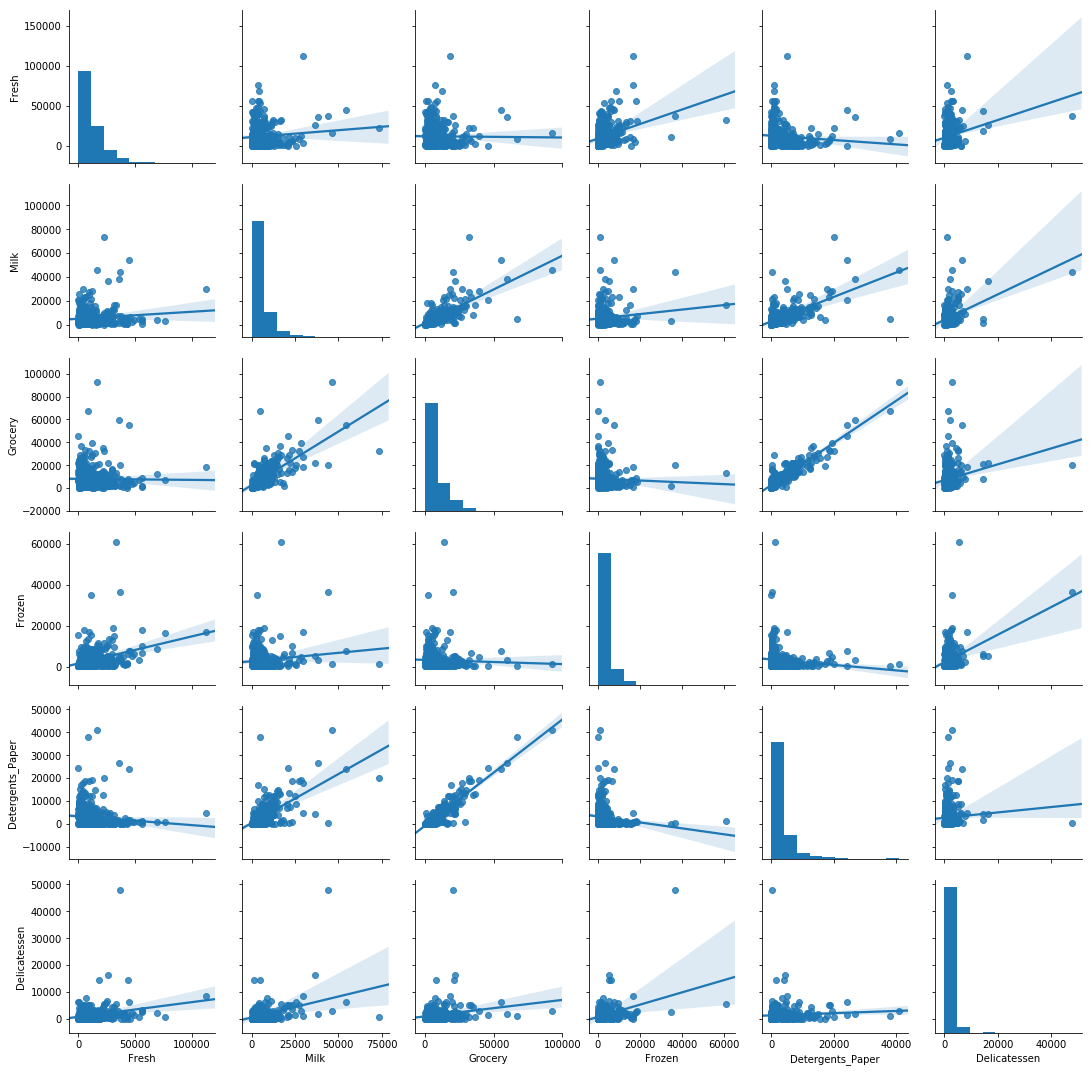

In [17]:
import time
start = time.time()
sns.pairplot(customer_features, kind='reg')
print(time.time() - start)

In [19]:
customer_features.corr()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000

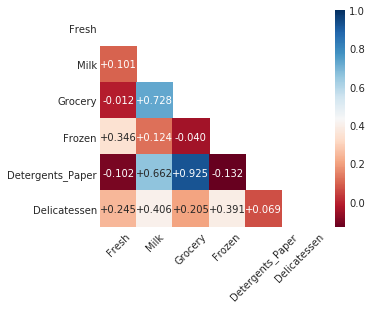

In [18]:
corr = customer_features.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

In [20]:
from sklearn.preprocessing import StandardScaler
import scipy.stats as st

In [21]:
sample_1pct_1 = customer_features.sample(5)

In [22]:
samp_stats = sample_1pct_1.describe().T
samp_stats['skew'] = st.skew(sample_1pct_1)
samp_stats['kurt'] = st.kurtosis(sample_1pct_1)
samp_stats

count    mean          std     min     25%     50%     75%  \
Fresh               5.0  7201.2  7114.754648   161.0  2932.0  5963.0  8258.0   
Milk                5.0  4749.8  2127.190918  2344.0  3648.0  3838.0  6459.0   
Grocery             5.0  8276.4  9662.375422   593.0  2147.0  6192.0  7677.0   
Frozen              5.0  2426.6  1892.806725   425.0   617.0  2561.0  3896.0   
Detergents_Paper    5.0  3673.2  4881.229937    28.0   266.0  1716.0  4573.0   
Delicatessen        5.0  1279.2   705.209685   635.0   750.0  1215.0  1386.0   

                      max      skew      kurt  
Fresh             18692.0  0.845755 -0.533207  
Milk               7460.0  0.257864 -1.501984  
Grocery           24773.0  1.176234 -0.168598  
Frozen             4634.0 -0.000583 -1.656616  
Detergents_Paper  11783.0  1.054118 -0.439109  
Delicatessen       2410.0  0.821971 -0.617166

In [23]:
stats = customer_features.describe().T
stats['skew'] = st.skew(customer_features)
stats['kurt'] = st.kurtosis(customer_features)
stats

count          mean           std   min      25%     50%  \
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicatessen      440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max       skew        kurt  
Fresh             16933.75  112151.0   2.552583   11.392124  
Milk               7190.25   73498.0   4.039922   24.376349  
Grocery           10655.75   92780.0   3.575187   20.664153  
Frozen             3554.25   60869.0   5.887826   54.056180  
Detergents_Paper   3922.00   40827.0   3.619458   18.780528  
Delicatessen       1820.25   47943.0  11.113534  168.747781

---

In [25]:
customer_z_scores = (customer_features - customer_features.mean())/customer_features.std()

#### MANY OF THE TOOLS WE WILL USE WILL ASSUME NORMAL DATA

---

You are already familiar with standardization.

$$Z = \frac{X-\mu}{\sigma}$$

In [ ]:
customer_z_scores = (customer_features - customer_features.mean())/customer_features.std()

Instantiate the scaler.

In [26]:
scaler = StandardScaler()

In [29]:
customer_scaled = scaler.fit_transform(customer_features)

In [30]:
scaler.fit(customer_features)
customer_sc = scaler.transform(customer_features)

Load it into a dataframe.

In [34]:
customer_sc_df = pd.DataFrame(customer_sc, columns=customer_features.columns)

In [33]:
customer_z_scores.head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.052873  0.522972 -0.041068 -0.588697         -0.043519     -0.066264
1 -0.390857  0.543839  0.170125 -0.269829          0.086309      0.089050
2 -0.446521  0.408073 -0.028125 -0.137379          0.133080      2.240742
3  0.099998 -0.623310 -0.392530  0.686363         -0.498021      0.093305
4  0.839284 -0.052337 -0.079266  0.173661         -0.231654      1.297870

In [32]:
customer_sc_df.head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569     -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407      0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232      2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588      0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918      1.299347

In [ ]:
sc_stats = customer_sc_df.describe().T
sc_stats['skew'] = st.skew(customer_features)
sc_stats['kurt'] = st.kurtosis(customer_features)
display(stats)
display(sc_stats)

### Visualizing Data Transformation

In [37]:
import warnings

warnings.simplefilter("ignore")

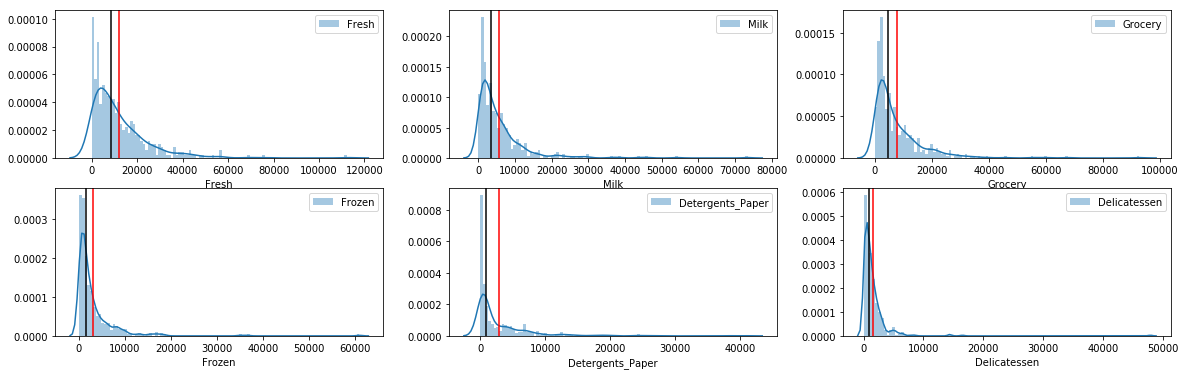

In [42]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_features.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_features[col], label=col, bins=100)
    plt.axvline(customer_features[col].mean(), c='red')
    plt.axvline(customer_features[col].median(), c='black')
    plt.legend()

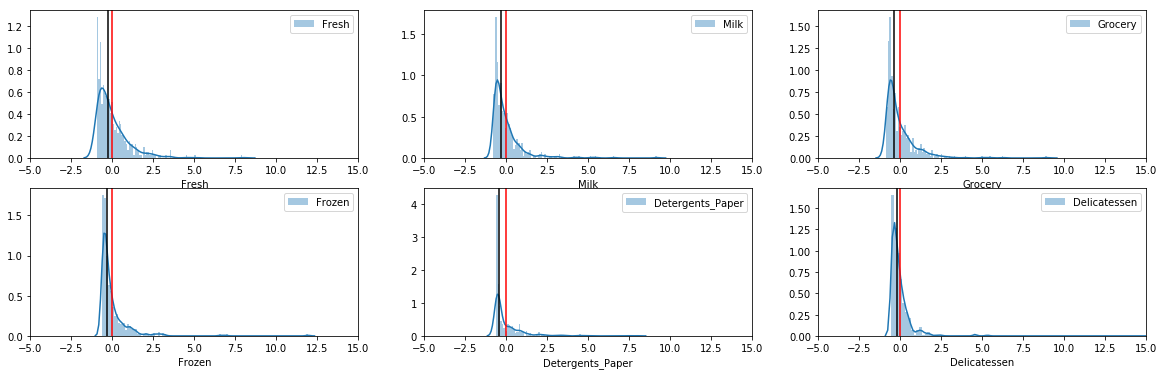

In [43]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_sc_df.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_sc_df[col], label=col, bins=100)
    plt.axvline(customer_sc_df[col].mean(), c='red')
    plt.axvline(customer_sc_df[col].median(), c='black')
    plt.legend()
    plt.xlim(-5,15)

#### MANY OF THE TOOLS WE WILL USE WILL ASSUME NORMAL DATA

---